In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import sys
from pprint import pprint

sys.path.append('../')

import bl_plots_new as blp
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, f1_score, confusion_matrix

In [28]:
for group in ['1yeardeath', '2year', 'Opt_Group']:
    
    #group = '2year'
    datasets = {key: pd.read_pickle(f'./Results/best_Opt/{group}/{key}/results.pickle') for key in ['ASMA', 'ASMA_FTIR', 'FTIR']}

    plot_data = blp.data_plot(datasets, patient=True);
    plot_data.savefig(f'/mnt/c/Users/conor/Git_Projects/PHD/December_Prognosis/Paper_Plots/Curves/{group}_roc_pr_curves.pdf', bbox_inches='tight')
    stats = blp.calc_stats(datasets, patient=True)

    pprint(stats.groupby('Vars').median())
    plot_box = blp.box_plot(stats.drop(['MCC', 'Thresh'], axis=1))
    plot_box.savefig(f'/mnt/c/Users/conor/Git_Projects/PHD/December_Prognosis/Paper_Plots/Stats/{group}_stats.pdf', bbox_inches='tight')

    fig, axes = plt.subplots(ncols=3, figsize=(9,3), sharey=True);
    fig.subplots_adjust(wspace=0.05)

    for ax, (key, dataset) in zip(axes.flatten(), datasets.items()):

        ax.set_title(key.replace('_','+'))
        kmco = blp.km_curve(dataset)
        blp.plot_kcmo(kmco, ax=ax, logp=False)

        #tsi, fsi, ps = blp.km_calculate(dataset.reset_index(['survival (months)', 'DiedvsAlive']), 'survival (months)', 'Preds', 'DiedvsAlive')

        #blp.km_plots(tsi, fsi, axin=ax, ste=True, median=True)

    fig.savefig(f'/mnt/c/Users/conor/Git_Projects/PHD/December_Prognosis/Paper_Plots/Surv_Curves/{group}_stats.pdf', bbox_inches='tight')
    break

<AxesSubplot:xlabel='Preds', ylabel='split'>

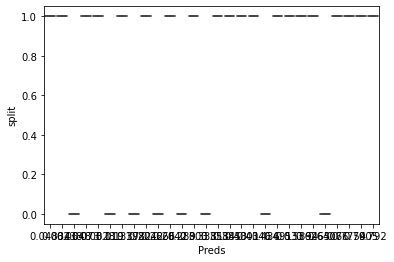

In [6]:
tdf=dataset.reset_index('DiedvsAlive')
tdf['split'] = (tdf['DiedvsAlive']=='Died')
tdf.groupby('Patient_Number').median()

sns.boxplot(data=tdf.groupby('Patient_Number').median(), x='Preds', y='split')

Text(0, 0.5, 'Frequency')

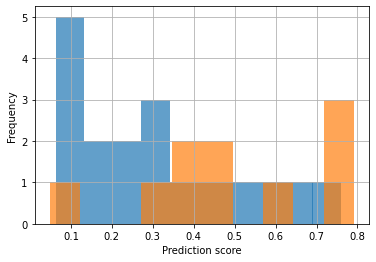

In [26]:
fig, ax = plt.subplots()


for n, df in dataset.groupby('Patient_Number').median().groupby('Y_true'):

    df['Preds'].hist(ax=ax, alpha=0.7)

ax.set_xlabel('Prediction score')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

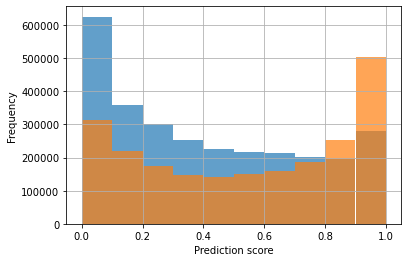

In [27]:
fig, ax = plt.subplots()

for n, df in dataset.groupby('Y_true'):

    df['Preds'].hist(ax=ax, alpha=0.7)

ax.set_xlabel('Prediction score')
ax.set_ylabel('Frequency')